In [531]:
%load_ext autoreload
%autoreload 2

from lib.datasets.coco import coco

imdb = coco('trainplus35kval', '2014')

print(imdb[0].keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<bound method coco.default_roidb of <lib.datasets.coco.coco object at 0x7fb7e30d8a10>>
loading annotations into memory...
Done (t=23.23s)
creating index...
we have 118287 images:
index created!


TypeError: 'coco' object does not support indexing

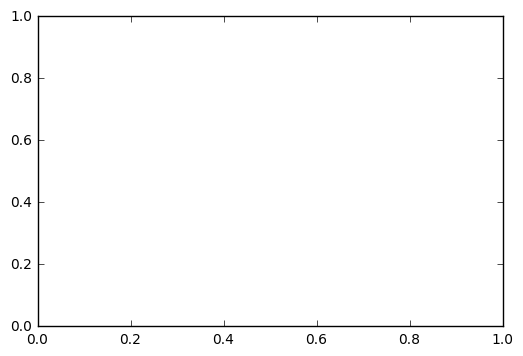

In [9]:
%matplotlib inline

#imdb._load_coco_annotation(imdb._image_index[1])

imdb._COCO.showAnns(imdb._COCO.loadAnns(imdb._COCO.getAnnIds(imgIds=imdb._image_index[3], iscrowd=None)))

#imdb._COCO.loadAnns(imdb._COCO.getAnnIds(imgIds=imdb._image_index[0], iscrowd=None))

In [533]:
%load_ext autoreload
%autoreload 2

from lib.fast_rcnn.train import get_data_layer
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
from lib.fast_rcnn.train import get_training_roidb

roidb = get_training_roidb(imdb)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Appending horizontally-flipped training examples...
done
Preparing training data...
done


In [534]:
data_layer = get_data_layer(roidb, imdb.num_classes)

In [ ]:


%matplotlib inline
#

blob = data_layer.forward()

i = blob['data'][0,:,:,:]
mask = blob['gt_segmentation'][0]
print(blob['im_info'])
print(blob['im_name'])
print(blob['flipped'])

print()
i[:,:,2] += mask * 255
b = blob['gt_boxes'][0][:4]
print(b)
plt.plot(b[::2], b[1::2])
plt.imshow(i[:,:,2], cmap='RdGy')
plt.show()

In [5]:
import lib.networks.FPN_train as net

n = net()
losses = n.build_loss()

Tensor("data:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("res1_2/pool1:0", shape=(?, ?, ?, 64), dtype=float32)
Tensor("res1_2/bn2a_branch1/batchnorm/add_1:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res1_2/bn2a_branch2c/batchnorm/add_1:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res1_2/res2a_relu:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res1_2/bn2b_branch2c/batchnorm/add_1:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res1_2/res2b_relu:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res1_2/bn2c_branch2c/batchnorm/add_1:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res3_5/res2c_relu:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("res3_5/bn3a_branch1/batchnorm/add_1:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("res3_5/bn3a_branch2c/batchnorm/add_1:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("res3_5/res3a_relu:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("res3_5/bn3b_branch2c/batchnorm/add_1:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("res3_5/res3

In [4]:
import tensorflow as tf



sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [6]:
blob = data_layer.forward()

print(len(blob['gt_boxes']))
feed_dict={
                n.data: blob['data'],
                n.im_info: blob['im_info'],
                n.keep_prob: 0.5,
                n.gt_boxes: blob['gt_boxes'],
                n.gt_ishard: blob['gt_ishard'],
                n.masks: blob['gt_segmentation'],
                n.dontcare_areas: blob['dontcare_areas']
            }

o = sess.run([n.get_output('roi-data-mask')], feed_dict=feed_dict)
    
print(o)

(['gt_classes', 'max_classes', 'image', 'masks', 'flipped', 'width', 'boxes', 'max_overlaps', 'height', 'seg_areas', 'gt_overlaps'], False)
5
num gt: 5
num fg: 10
num bg: 17
[{'rois': array([[   0.        ,   38.77809525,  160.56063843,   52.52809525,
         193.06063843],
       [   0.        ,   22.64439201,  166.82717896,   30.14439201,
         194.32717896],
       [   0.        ,   23.72101212,  161.20501709,   26.22101212,
         168.70501709],
       [   0.        ,   22.5       ,  166.25      ,   30.        ,  193.75      ],
       [   0.        ,   38.75      ,  161.25      ,   52.5       ,  193.75      ],
       [   0.        ,   15.        ,  162.5       ,   23.75      ,  198.75      ],
       [   0.        ,   23.75      ,  161.25      ,   26.25      ,  168.75      ],
       [   0.        ,   14.8309269 ,  161.73587036,   23.5809269 ,
         197.98587036],
       [   0.        ,   67.5       ,  488.75      ,  260.        ,  791.25      ],
       [   0.        ,   66.

In [7]:
for key, values in o[0].iteritems():
    if key == 'fpn_rois':
        for r in o[0][key]:
            print(r)
    else:
        print(key)
        print(o[0][key])

rois
[[   0.           38.77809525  160.56063843   52.52809525  193.06063843]
 [   0.           22.64439201  166.82717896   30.14439201  194.32717896]
 [   0.           23.72101212  161.20501709   26.22101212  168.70501709]
 [   0.           22.5         166.25         30.          193.75      ]
 [   0.           38.75        161.25         52.5         193.75      ]
 [   0.           15.          162.5          23.75        198.75      ]
 [   0.           23.75        161.25         26.25        168.75      ]
 [   0.           14.8309269   161.73587036   23.5809269   197.98587036]
 [   0.           67.5         488.75        260.          791.25      ]
 [   0.           66.61943817  495.925354    259.1194458   798.425354  ]]
level_idxs
[1 2 4 2 1 3 4 3 0 0]
[[   0.           38.77809525  160.56063843   52.52809525  193.06063843]
 [   0.           22.64439201  166.82717896   30.14439201  194.32717896]
 [   0.           23.72101212  161.20501709   26.22101212  168.70501709]
 [   0.     

((600, 779, 3), dtype('float32'))
[ 617.03851318   53.54969406  776.47058105  332.25152588]


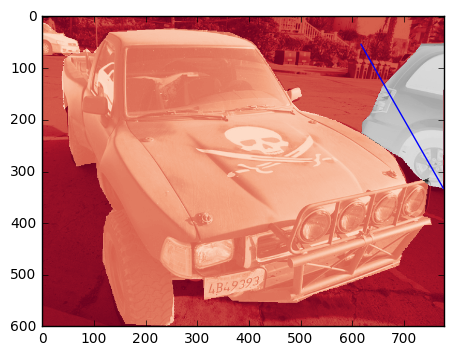

In [60]:
i = blob['data'][0,:,:,:]
mask = r[3][1]
print(i.shape, i.dtype)

i[:,:,2] += mask * 255
b = blob['gt_boxes'][1][:4]
print(b)
plt.plot(b[::2], b[1::2])
plt.imshow(i[:,:,2], cmap='RdGy')
plt.show()

In [10]:
rois = n.get_output('roi-data-mask')['rois']

rois_2 = tf.concat([tf.expand_dims(tf.range(tf.cast(10, dtype=tf.float32), dtype=tf.float32), -1), rois[:,1:]], axis=1)


r = sess.run([rois_2, rois, n.get_output('roi-data-mask'), n.get_output('masks')], feed_dict=feed_dict)

num gt: 5
num fg: 10
num bg: 17


In [11]:
print(r[0])
print(r[1])

[[   0.           15.          162.5          23.75        198.75      ]
 [   1.           38.75        161.25         52.5         193.75      ]
 [   2.           38.602314    160.68087769   52.352314    193.18087769]
 [   3.           22.5         166.25         30.          193.75      ]
 [   4.           14.75636578  162.73222351   23.50636482  198.98222351]
 [   5.           23.75        161.25         26.25        168.75      ]
 [   6.           22.65768623  166.855896     30.15768623  194.355896  ]
 [   7.           23.70994568  161.18005371   26.20994568  168.68005371]
 [   8.           67.5         488.75        260.          791.25      ]
 [   9.           65.59027863  483.75631714  258.090271    786.25634766]]
[[   0.           15.          162.5          23.75        198.75      ]
 [   0.           38.75        161.25         52.5         193.75      ]
 [   0.           38.602314    160.68087769   52.352314    193.18087769]
 [   0.           22.5         166.25         30. 

In [20]:
sess.run([rois, tf.gather(n.get_output('gt_boxes'), n.get_output('roi-data-mask')['level_idxs'])], feed_dict=feed_dict)

RuntimeError: Attempted to use a closed Session.

In [21]:
sess.close()